In [1]:
%matplotlib inline


# Feature importances with forests of trees


This examples shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The red bars are the feature
importances of the forest, along with their inter-trees variability.
Inspired from sciki-tutorials.

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



Automatically created module for IPython interactive environment


## Read dataset with Pandas.
As previous examples, we use pandas to read datasets, and standarize the data.

In [3]:

#I use this dataset because this has clearly separated cathegories, 
#Read the database using pandas, 
#Note that bad lines are omitted with error_bad_lines=False
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/00236/seeds_dataset.txt', header=None, sep="\t", error_bad_lines=False)

#The headers are not given in the dataset, so we give them afterwords:
#1. area A, 
#2. perimeter P, 
#3. compactness C = 4*pi*A/P^2, 
#4. length of kernel, 
#5. width of kernel, 
#6. asymmetry coefficient 
#7. length of kernel groove. 
#8. Class: 1=Kama, 2=Rosa, 3=Canadian
column_header= ["area","perimeter","compactness","kernel-length","kernel-width",
              "asymmetry","kernel-groove-length","class"]
df.columns = column_header

#This shows the header of the database:
df.head()

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,kernel-length,kernel-width,asymmetry,kernel-groove-length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
#This sets class=2 to 0 and 3 to 1:
y = df.loc[:,'class']

#Extract some cathegories:
X=df.iloc[:,0:7]
#This is to convert the csv dictionary into a numpy matrix to later standarize:
X=X.as_matrix()

nfeature=X.shape[1]

# standardize features
X_std = np.copy(X)
for ifeat in range(0,nfeature):
    X_std[:,ifeat] = (X[:,ifeat] - X[:,ifeat].mean()) / X[:,ifeat].std()


## Forest trees to compute feature importances.
Here we build a forest to compute feature importances.
Choosing feature importances is a complicated task and is well explained elsewhere. Please read: 
https://en.wikipedia.org/wiki/Feature_selection
http://alexperrier.github.io/jekyll/update/2015/08/27/feature-importance-random-forests-gini-accuracy.html

Feature selection can result in more cost effective models, by reducing the number of features when is large. 


"Regularized trees penalize using a variable similar to the variables selected at previous tree nodes for splitting the current node. Regularized trees only need build one tree model (or one tree ensemble model) and thus are computationally efficient." [Wiki]


Feature ranking:
1. feature 1 (           perimeter): 0.188693
2. feature 0 (                area): 0.192316
3. feature 6 (kernel-groove-length): 0.066855
4. feature 4 (        kernel-width): 0.138654
5. feature 3 (       kernel-length): 0.141697
6. feature 5 (           asymmetry): 0.086625
7. feature 2 (         compactness): 0.185160


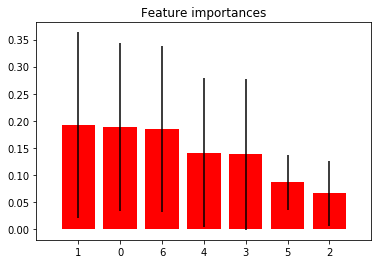

In [5]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%20s): %f" % (f + 1, indices[f],column_header[indices[f]], importances[f]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()